# Convergence Tests

In [2]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

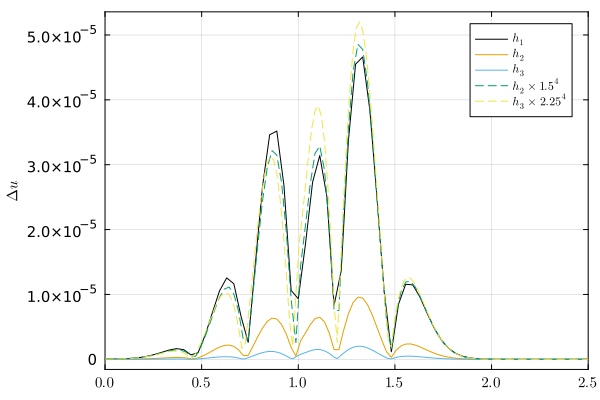

In [5]:
plts = []
conv_bases = [1, 1.5, 2.25]
let l=0, t=1.0, dirss,
    dirss = [
        [
            #("gaussian_96_r0000/gaussian_96/", "96"),
            #("gaussian_144_r0000/gaussian_144/", "144"),
            ("gaussian_216_r0000/gaussian_216/", "216"),
            ("gaussian_324_r0000/gaussian_324/", "324"),
            ("gaussian_486_r0000/gaussian_486/", "324"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/2levels",
                                                  prefix="testsubcyclingmc2-error",
                                                  level=l, ngh=0)
        
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
        xticks!(plt, xs, [L"%$(n)" for n in xs])

        labs = [L"h_1", L"h_2", L"h_3"]
        for (i, dat) in enumerate(dats)
            lab = labs[i]
            plt = plot!(dat[1], abs.(dat[2]), linewidth=1, framestyle=:box, label=lab, ylabel=L"\Delta u")
        end

        scalelabs = [L"h_2\times 1.5^4", L"h_3\times 2.25^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = scalelabs[i]
            plt = plot!(dat[1], abs.(dat[2]) * (conv_bases[i+1]^4), linewidth=1, linestyle=:dash, label=lab)
            plt = plot!(xlim=(0,2.5))
            #plt = plot!(ylim=(0,5e-5))
        end

        display(plt)
    end
end

In [6]:
# Convergence Factor
factor12v23(order) = (1 - (1/1.5)^order) / ((1/1.5)^order - (1/2.25)^order)
factor23v34(order) = ((1/1.5)^order - (1/2.25)^order) / ((1/2.25)^order - (1/3.375)^order)

factor23v34 (generic function with 1 method)

In [7]:
factor12v23(4)-factor23v34(4)

8.881784197001252e-16

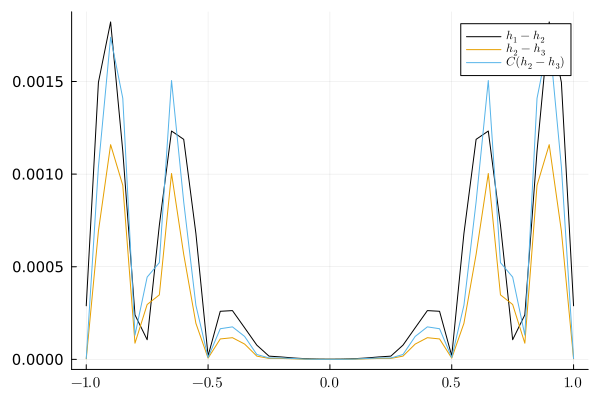

In [11]:
plts = []
let l=1, t=1.0, dirss,
    dirss = [
        [
            ("gaussian_96_r0000/gaussian_96/", "96"),
            ("gaussian_144_r0000/gaussian_144/", "144"),
            ("gaussian_216_r0000/gaussian_216/", "216"),
            ("gaussian_324_r0000/gaussian_324/", "324"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/2levels",
                                                  prefix="testsubcyclingmc2-state",
                                                  level=l, ngh=0)

        # Interpolate
        itps = []
        for dat in dats
            push!(itps, linear_interpolation(dat[1], dat[2]))
        end

        x0 = -1.0:0.05:1.0
        f_h1_h2 = itps[1].(x0) - itps[2].(x0)
        f_h2_h3 = itps[2].(x0) - itps[3].(x0)
        f_h3_h4 = itps[3].(x0) - itps[4].(x0)
        
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        xs = [-1.0, -0.5, 0.0, 0.5, 1.0]
        xticks!(plt, xs, [L"%$(n)" for n in xs])

        plt = plot!(x0, abs.(f_h1_h2), label=L"h_1-h_2")
        plt = plot!(x0, abs.(f_h2_h3), label=L"h_2-h_3")
        #plt = plot!(x0, abs.(f_h3_h4), label=L"h_3-h_4")
        plt = plot!(x0, abs.(f_h2_h3) * factor12v23(1), label=L"C(h_2-h_3)")
        #plt = plot!(x0, abs.(f_h3_h4) * factor23v34(4), label=L"C(h_3-h_4)")

        display(plt)
    end
end